This notebook is all about figuring out what windows are used for learning each parameter

In [1]:
import apogee.modelspec.turbospec
from apogee.modelatm import atlas9
from apogee.modelspec import ferre
from apogee.tools import paramIndx
import apogee.tools.path as apogee_path

import matplotlib.pyplot as plt
import numpy as np

from apoNN.src.utils import dump as dump 
from apoNN.src.utils import load as load 

apogee_path.change_dr(12)

[(['TEFF', 'LOGG', 'LOG10VDOP', 'METALS', 'C', 'N', 'O Mg Si S Ca Ti'], ['C', 'N', 'O', 'Na', 'Mg', 'Al', 'Si', 'S', 'K', 'Ca', 'Ti', 'V', 'Mn', 'Fe', 'Ni'], ['[C/M]', '[N/M]', '[O/M]', '[Na/H]', '[Mg/M]', '[Al/H]', '[Si/M]', '[S/M]', '[K/H]', '[Ca/M]', '[Ti/M]', '[V/H]', '[Mn/H]', '[Fe/H]', '[Ni/H]'], [0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1])]


In [2]:
atm= atlas9.Atlas9Atmosphere(teff=4000.,logg=2.5,metals=-0.25,am=0.25,cm=0.25)
synspec= apogee.modelspec.turbospec.synth([11,-1,1.0],modelatm=atm,linelist='201404080919',lsf='all',cont='aspcap',vmacro=6.,isotopes='solar')

2920 2920                                                                       
2920 2920


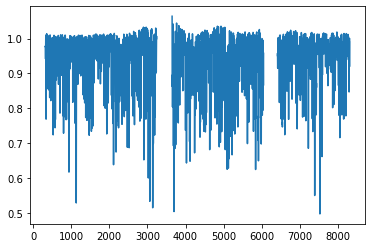

In [178]:
plt.plot(synspec[0])

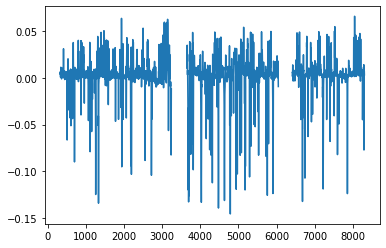

In [113]:
plt.plot(synspec[1]-synspec[0])

In [7]:
synspec[0].shape

(8575,)

In [9]:
waveregions

NameError: name 'waveregions' is not defined

In [114]:
import apogee.spec.window as apwindow


In [115]:
start,end = apwindow.waveregions("Fe",asIndex=True)

In [116]:
start

[511,
 697,
 926,
 982,
 1122,
 1373,
 1796,
 1849,
 1898,
 2011,
 2097,
 2328,
 2386,
 2505,
 2651,
 2724,
 2974,
 3112,
 3170,
 3705,
 3836,
 3935,
 3991,
 4041,
 4071,
 4232,
 4518,
 4548,
 4768,
 4887,
 4944,
 5034,
 5134,
 5241,
 5332,
 5513,
 5617,
 5652,
 5978,
 6009,
 6454,
 6502,
 6566,
 6650,
 6805,
 6918,
 6952,
 7065,
 7141,
 7203,
 7527,
 7722,
 7911,
 8009]

In [117]:
end

[551,
 721,
 937,
 1005,
 1146,
 1394,
 1824,
 1877,
 1928,
 2032,
 2115,
 2339,
 2431,
 2516,
 2685,
 2736,
 2986,
 3126,
 3183,
 3799,
 3853,
 3953,
 4006,
 4052,
 4082,
 4259,
 4528,
 4567,
 4780,
 4903,
 4956,
 5049,
 5170,
 5275,
 5348,
 5525,
 5630,
 5665,
 5991,
 6035,
 6470,
 6534,
 6581,
 6670,
 6818,
 6931,
 6964,
 7079,
 7171,
 7225,
 7543,
 7752,
 7937,
 8025]

(1898, 1928)

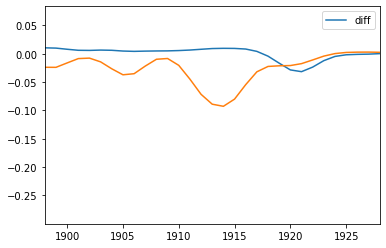

In [123]:
i=8
plt.plot(synspec[1]-synspec[0],label="diff")
plt.plot((synspec[1]-1)*0.5)
plt.legend()
plt.xlim(start[i],end[i])
#plt.xlim(2170,2180)

In [106]:
for i in range(len(start)):
    print(end[i]-start[i])

40
24
11
23
24
21
28
28
30
21
18
11
45
11
34
12
12
14
13
94
17
18
15
11
11
27
10
19
12
16
12
15
36
34
16
12
13
13
13
26
16
32
15
20
13
13
12
14
30
22
16
30
26
16


In [125]:
import apogee.tools.path as apath

In [129]:
apogee_path._APOGEE_REDUX

'v603'

In [134]:
def get_window(elem):
    current_apogee_redux = apogee_path._APOGEE_REDUX
    apogee_path.change_dr(12)
    start,end = apwindow.waveregions(elem,asIndex=True)
    apogee_path._APOGEE_REDUX = current_apogee_redux
    return (start,end)
    

In [135]:
apogee_path.change_dr(16)

In [137]:
start,end = get_window("Fe")

In [156]:
synspec[0].shape

(8575,)

In [164]:
def get_mask_elem(elem):
    spec_mask =np.zeros(8575)
    start,end = get_window(elem)
    for i in range(len(start)):
        line_idx = np.arange(start[i],end[i])
        spec_mask[line_idx] = 1
        
    return spec_mask

(5500, 6000)

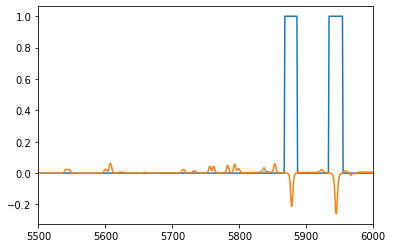

In [185]:
plt.plot(get_mask_elem("Na"))
plt.plot(synspec[1]-synspec[0])
plt.xlim(5500,6000)

In [151]:
spec_mask[np.arange(start[0],end[0])]=1

In [153]:
spec_mask[500:520]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [138]:
start

[511,
 697,
 926,
 982,
 1122,
 1373,
 1796,
 1849,
 1898,
 2011,
 2097,
 2328,
 2386,
 2505,
 2651,
 2724,
 2974,
 3112,
 3170,
 3705,
 3836,
 3935,
 3991,
 4041,
 4071,
 4232,
 4518,
 4548,
 4768,
 4887,
 4944,
 5034,
 5134,
 5241,
 5332,
 5513,
 5617,
 5652,
 5978,
 6009,
 6454,
 6502,
 6566,
 6650,
 6805,
 6918,
 6952,
 7065,
 7141,
 7203,
 7527,
 7722,
 7911,
 8009]

In [188]:
from apoNN.src.datasets import ApogeeDataset,AspcapDataset
import torch

allStar =  load("allStar_training_restricted")
dataset=  AspcapDataset(filename="aspcap_restricted",tensor_type=torch.FloatTensor,recenter=True)
n_data=10000

In [142]:
start

[511,
 697,
 926,
 982,
 1122,
 1373,
 1796,
 1849,
 1898,
 2011,
 2097,
 2328,
 2386,
 2505,
 2651,
 2724,
 2974,
 3112,
 3170,
 3705,
 3836,
 3935,
 3991,
 4041,
 4071,
 4232,
 4518,
 4548,
 4768,
 4887,
 4944,
 5034,
 5134,
 5241,
 5332,
 5513,
 5617,
 5652,
 5978,
 6009,
 6454,
 6502,
 6566,
 6650,
 6805,
 6918,
 6952,
 7065,
 7141,
 7203,
 7527,
 7722,
 7911,
 8009]

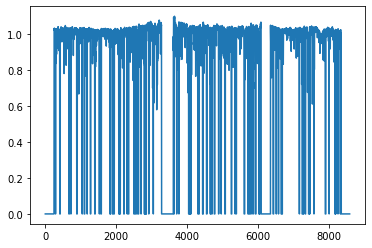

In [195]:
plt.plot(dataset[0][1].numpy())

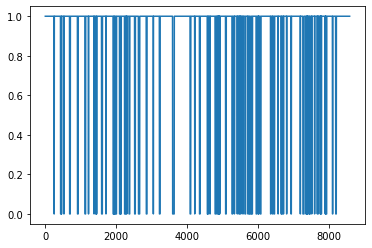

In [210]:
plt.plot((dataset.dataset["aspcap_err"][1]<dataset.err_threshold).astype(float))


In [214]:
mask_elem  = get_mask_elem("Na")

In [200]:
dataset.__dict__

{'tensor': torch.FloatTensor,
 'filtered_bits': [0, 1, 2, 3, 9, 7, 5, 5, 8],
 'filling_dataset': None,
 'err_threshold': 0.05,
 'serialized': True,
 'outputs': ['aspcap', 'aspcap_err', 'idx'],
 'recenter': True,
 'dataset': {'aspcap': array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
  'aspcap_err': array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
  'idx': array([   0,    1,    2, ..., 9997, 9998, 9999]),
  'aspcap_interpolated': array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         

In [221]:
mask_spectra = (dataset.dataset["aspcap_err"][8]<dataset.err_threshold).astype(float)

(5700, 5900)

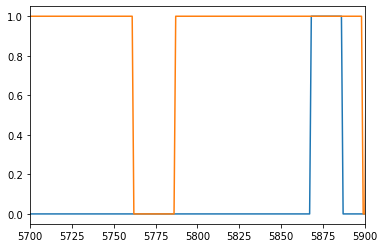

In [223]:
plt.plot(mask_elem)
plt.plot(mask_spectra)

plt.xlim(5700,5900)

In [225]:
from apogee.tools import bitmask

import random
import numpy as np

import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import torch.nn as nn

from apoNN.src.datasets import ApogeeDataset,AspcapDataset
from apoNN.src.utils import generate_loss_with_masking

from tagging.src.networks import ConditioningAutoencoder,Embedding_Decoder,Feedforward,ParallelDecoder,Autoencoder

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
apogee_path.change_dr(16)



In [394]:

n_batch = 64
n_z = 8
n_bins = 8575
lr = 0.0001
dataset_name = "aspcap_restricted"
dataset_outputs = ["aspcap","mask2","physical","idx"]
loss = "l2"
use_masked_loss = True
savename = "ae"
encoder_architecture = [n_bins,2048,1024,n_z]
decoder_architecture = [n_z,256,512,np.sum(mask_elem).astype(int)]
activation = nn.LeakyReLU()
recenter=True


In [395]:
dataset = AspcapDataset(filename=dataset_name,recenter=recenter)

loader = torch.utils.data.DataLoader(dataset = dataset,
                                     batch_size = n_batch,
                                     shuffle= False,
                                     drop_last=True)


encoder = Feedforward(encoder_architecture ,activation=activation).to(device)
decoder = Feedforward(decoder_architecture ,activation=activation).to(device)

autoencoder = Autoencoder(encoder,decoder,n_bins=n_bins,intermediate_activation=activation).to(device)
optimizer_autoencoder = torch.optim.Adam(autoencoder.parameters(), lr=lr)




In [396]:

if loss == "l1":
    loss = nn.L1Loss()
elif loss == "l2":
    loss = nn.MSELoss()

if use_masked_loss:
    masked_loss = generate_loss_with_masking(loss)



In [397]:
t_mask_elem = torch.tensor(mask_elem).repeat(n_batch,1).type(torch.bool)

In [ ]:
for i in range(30000):
    if i%250==0:
        torch.save(autoencoder,f"{savename}_{i}.p")

    for j,(x,x_raw,x_err,idx) in enumerate(loader):
        optimizer_autoencoder.zero_grad()
        x_pred,z = autoencoder(x.to(device))
        x_window = x[t_mask_elem].reshape(n_batch,np.sum(mask_elem).astype(int))
        if use_masked_loss:
            mask = x_err<dataset.err_threshold
            mask_window = mask[t_mask_elem].reshape(n_batch,np.sum(mask_elem).astype(int))

            err_pred = masked_loss(x_pred,x_window.to(device),mask_window)
        else:
            err_pred = loss(x_pred,x_window.to(device))

        err_tot = err_pred
        err_tot.backward()
        optimizer_autoencoder.step()
        if j%100==0:
            print(f"err:{err_tot},err_pred:{err_pred}")
                 

err:1.2357353625702672e-05,err_pred:1.2357353625702672e-05
err:1.1958828508795705e-05,err_pred:1.1958828508795705e-05
err:8.430431989836507e-06,err_pred:8.430431989836507e-06
err:1.1633613212325145e-05,err_pred:1.1633613212325145e-05
err:8.198270734283142e-06,err_pred:8.198270734283142e-06
err:1.1461208487162367e-05,err_pred:1.1461208487162367e-05
err:8.567511031287722e-06,err_pred:8.567511031287722e-06
err:1.1497256309667137e-05,err_pred:1.1497256309667137e-05
err:8.314164006151259e-06,err_pred:8.314164006151259e-06
err:1.1543727850948926e-05,err_pred:1.1543727850948926e-05
err:8.696842996869236e-06,err_pred:8.696842996869236e-06
err:1.173087912320625e-05,err_pred:1.173087912320625e-05
err:8.522132702637464e-06,err_pred:8.522132702637464e-06
err:1.1439566151238978e-05,err_pred:1.1439566151238978e-05
err:8.563953997509088e-06,err_pred:8.563953997509088e-06
err:1.13762234832393e-05,err_pred:1.13762234832393e-05
err:8.56546284921933e-06,err_pred:8.56546284921933e-06
err:1.117437750508543

err:1.1421025192248635e-05,err_pred:1.1421025192248635e-05
err:7.92725677456474e-06,err_pred:7.92725677456474e-06
err:1.1393036402296275e-05,err_pred:1.1393036402296275e-05
err:7.8218681665021e-06,err_pred:7.8218681665021e-06
err:1.1323965736664832e-05,err_pred:1.1323965736664832e-05
err:8.013747901713941e-06,err_pred:8.013747901713941e-06
err:1.159403382189339e-05,err_pred:1.159403382189339e-05
err:7.77319110056851e-06,err_pred:7.77319110056851e-06
err:1.183618587674573e-05,err_pred:1.183618587674573e-05
err:8.10253004601691e-06,err_pred:8.10253004601691e-06
err:1.1626886589510832e-05,err_pred:1.1626886589510832e-05
err:7.868845386838075e-06,err_pred:7.868845386838075e-06
err:1.1476031431811862e-05,err_pred:1.1476031431811862e-05
err:7.851345799281262e-06,err_pred:7.851345799281262e-06
err:1.1165623618580867e-05,err_pred:1.1165623618580867e-05
err:8.146364052663557e-06,err_pred:8.146364052663557e-06
err:1.1280203580099624e-05,err_pred:1.1280203580099624e-05
err:8.131404683808796e-06,e

err:8.486194019496907e-06,err_pred:8.486194019496907e-06
err:1.1747908502002247e-05,err_pred:1.1747908502002247e-05
err:8.595317922299728e-06,err_pred:8.595317922299728e-06
err:1.2021342627122067e-05,err_pred:1.2021342627122067e-05
err:8.500669537170324e-06,err_pred:8.500669537170324e-06
err:1.173860437120311e-05,err_pred:1.173860437120311e-05
err:8.460321623715572e-06,err_pred:8.460321623715572e-06
err:1.2311910722928587e-05,err_pred:1.2311910722928587e-05
err:8.297197382489685e-06,err_pred:8.297197382489685e-06
err:1.3109193787386175e-05,err_pred:1.3109193787386175e-05
err:8.243186130130198e-06,err_pred:8.243186130130198e-06
err:1.2027126103930641e-05,err_pred:1.2027126103930641e-05
err:8.294020517496392e-06,err_pred:8.294020517496392e-06
err:1.1454763807705604e-05,err_pred:1.1454763807705604e-05
err:8.266623808594886e-06,err_pred:8.266623808594886e-06
err:1.1233722943870816e-05,err_pred:1.1233722943870816e-05
err:8.087692549452186e-06,err_pred:8.087692549452186e-06
err:1.10494538603

err:1.2526091268227901e-05,err_pred:1.2526091268227901e-05
err:8.311292731377762e-06,err_pred:8.311292731377762e-06
err:1.2104222150810529e-05,err_pred:1.2104222150810529e-05
err:8.580655958212446e-06,err_pred:8.580655958212446e-06
err:1.188580154121155e-05,err_pred:1.188580154121155e-05
err:8.590610377723351e-06,err_pred:8.590610377723351e-06
err:1.1656952665362041e-05,err_pred:1.1656952665362041e-05
err:8.444093509751838e-06,err_pred:8.444093509751838e-06
err:1.1253292541368864e-05,err_pred:1.1253292541368864e-05
err:8.643126420793124e-06,err_pred:8.643126420793124e-06
err:1.1145714779559057e-05,err_pred:1.1145714779559057e-05
err:8.325735507241916e-06,err_pred:8.325735507241916e-06
err:1.0944487257802393e-05,err_pred:1.0944487257802393e-05
err:8.559351044823416e-06,err_pred:8.559351044823416e-06
err:1.0961971383949276e-05,err_pred:1.0961971383949276e-05
err:8.233432708948385e-06,err_pred:8.233432708948385e-06
err:1.0971067240461707e-05,err_pred:1.0971067240461707e-05
err:8.245744538

In [261]:
x_pred[mask_elem].shape

torch.Size([8575, 40])

In [293]:
np.sum(mask_elem)

40.0

In [292]:
mask.shape

torch.Size([64, 8575])

In [346]:
x[torch.tensor(mask_elem).repeat(64,1).type(torch.bool)].reshape(n_batch,np.sum(mask_elem).astype(int))

tensor([[-0.0387, -0.0413, -0.0374,  ..., -0.0119, -0.0153, -0.0208],
        [-0.0008, -0.0056,  0.0056,  ..., -0.0107, -0.0163, -0.0179],
        [-0.0292, -0.0265, -0.0110,  ..., -0.0047, -0.0074, -0.0085],
        ...,
        [ 0.0072,  0.0078,  0.0129,  ..., -0.0107, -0.0163, -0.0179],
        [ 0.0188,  0.0154,  0.0085,  ..., -0.0155, -0.0048, -0.0095],
        [-0.0328, -0.0392, -0.0278,  ..., -0.0096, -0.0097, -0.0186]])

In [457]:
old_autoencoder = torch.load("/share/splinter/ddm/taggingProject/apogeeFactory/outputs/guild/aspcap/dim/z5b/ae_7000.p")


In [448]:
        x_pred,z = autoencoder(x.to(device))
        x_window = x[t_mask_elem].reshape(n_batch,np.sum(mask_elem).astype(int))
        mask_window = mask[t_mask_elem].reshape(n_batch,np.sum(mask_elem).astype(int))


(5860, 5900)

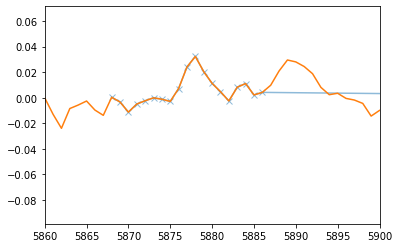

In [449]:
plt.plot(np.where(mask_elem==1)[0],x_window.detach().cpu().numpy()[1],alpha=0.5,marker="x")
plt.plot(x[1])
plt.xlim(5860,5900)

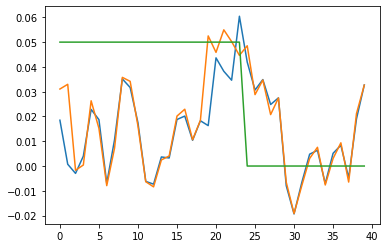

In [463]:
i = 0
plt.plot(x_pred.detach().cpu().numpy()[i])
plt.plot(x_window.detach().cpu().numpy()[i])
plt.plot(mask_window.detach().cpu().numpy()[i]*0.05)


In [464]:
x_pred_old,z_old = old_autoencoder(x.to(device))
x_pred_old_window = x_pred_old[t_mask_elem].reshape(n_batch,np.sum(mask_elem).astype(int))


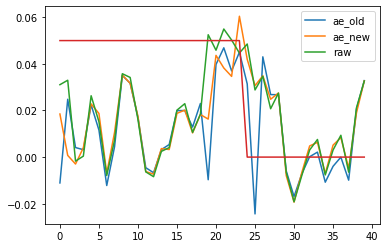

In [465]:
plt.plot(x_pred_old_window.detach().cpu().numpy()[i],label="ae_old")
plt.plot(x_pred.detach().cpu().numpy()[i],label="ae_new")
plt.plot(x_window.detach().cpu().numpy()[i],label="raw")
plt.plot(mask_window.detach().cpu().numpy()[i]*0.05)
plt.legend()

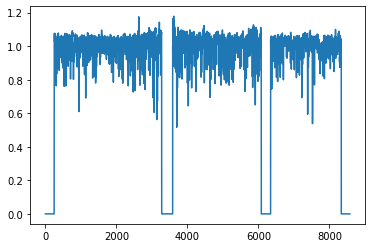

In [476]:
a= x_pred_old.detach().cpu().numpy()+np.mean(dataset.dataset["aspcap_interpolated"],axis=0)

plt.plot(a[0])

In [475]:
a= x_pred_old.detach().cpu().numpy()+np.mean(dataset.dataset["aspcap_interpolated"],axis=0)
a.shape

(64, 8575)

### Compare and visualize outputs

In [486]:
substracted_mean = np.mean(dataset.dataset["aspcap_interpolated"],axis=0)
substracted_mean_window = substracted_mean[mask_elem.astype(bool)]

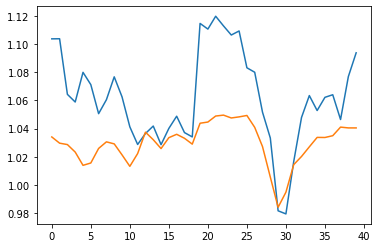

In [497]:
plt.plot(x_window.detach().cpu().numpy()[i]+substracted_mean_window,label="raw")


In [500]:
x_raw_window = dataset.dataset["aspcap"][i][mask_elem.astype(bool)]


In [481]:
substracted_mean[].shape

(8575,)

In [552]:
i=28
x_pred_old,_ = old_autoencoder(x.to(device))
x_pred,_ = autoencoder(x.to(device))
x_window = x[t_mask_elem].reshape(n_batch,np.sum(mask_elem).astype(int))
mask = x_err<dataset.err_threshold
mask_window = mask[t_mask_elem].reshape(n_batch,np.sum(mask_elem).astype(int))
x_pred_old_window = x_pred_old[t_mask_elem].reshape(n_batch,np.sum(mask_elem).astype(int))
substracted_mean = np.mean(dataset.dataset["aspcap_interpolated"],axis=0)
substracted_mean_window = substracted_mean[mask_elem.astype(bool)]

In [601]:
def plot_window(x,mask_elem,idx=0,label=None):
    if torch.is_tensor(x):
        x = x.detach().cpu().numpy()
    t_mask_elem = torch.tensor(mask_elem).repeat(n_batch,1).type(torch.bool)
    x_window = x[t_mask_elem].reshape(n_batch,np.sum(mask_elem).astype(int))
    plt.plot(x_window[idx],label=label)

    
        

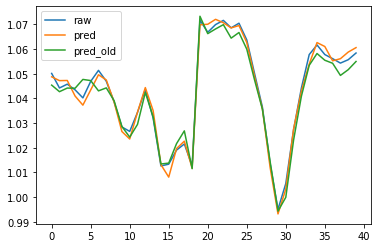

In [554]:
x_raw_window = dataset.dataset["aspcap"][idx[i].item()][mask_elem.astype(bool)]
plt.plot(x_window.detach().cpu().numpy()[i]+substracted_mean_window,label="raw")
#plt.plot(x_raw_window,label="raw")
plt.plot(x_pred.detach().cpu().numpy()[i]+substracted_mean_window,label="pred")
plt.plot(x_pred_old_window.detach().cpu().numpy()[i]+substracted_mean_window,label="pred_old")
#plt.plot(mask_window[i])
plt.legend()
#plt.xlim(10,20)

(5868, 5954)

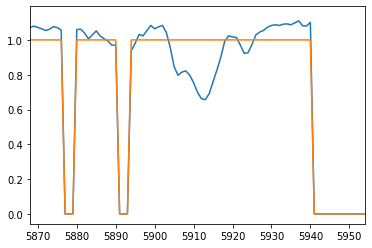

In [532]:
raw = dataset.dataset["aspcap"][i]
err = dataset.dataset["aspcap_err"][i]
mask = err<dataset.err_threshold

plt.plot(dataset.dataset["aspcap"][i])
plt.plot(mask)
plt.xlim(5868,5954)

### Extracting NA

In [663]:
import apoNN.src.vectors as vector

z = vector.LatentVector(dataset,old_autoencoder,n_data)


/share/splinter/ddm/taggingProject/apogeeFactory/apoNN/src/vectors.py:53: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  _,z = self.autoencoder(torch.tensor(self.dataset[idx][0]).to(device).unsqueeze(0))



/share/splinter/ddm/taggenv/lib64/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.



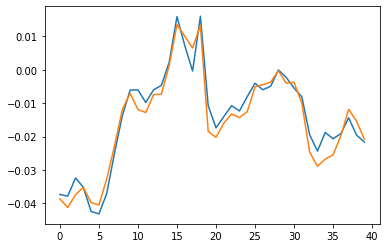

In [664]:
x_test=  torch.tensor(dataset[0:1][0]).to(device)
x_test_pred,z_test = autoencoder(x_test)
x_window = x_test[t_mask_elem[0:1,:]].reshape(1,np.sum(mask_elem).astype(int))

plt.plot(x_test_pred[0].detach().cpu().numpy())
plt.plot(x_window[0].detach().cpu().numpy())

In [665]:
z_test

tensor([[ 0.3100,  0.3455,  0.3276,  0.3629,  0.3776,  0.1602,  0.2957, -0.0049]],
       device='cuda:0', grad_fn=<AddmmBackward>)

In [666]:
z.raw[0]

array([ 0.18691552,  0.44086272,  0.19498906,  0.2526847 , -0.11907348],
      dtype=float32)

In [667]:
z = vector.Vector(z.raw[combined_cut[:n_data]])

In [668]:

upper_temp_cut = allStar["Teff"]<7000
lower_temp_cut = allStar["Teff"]>3500
lower_g_cut = allStar["logg"]>1.
upper_g_cut = allStar["logg"]<3.5
snr_cut = allStar["SNR"]>100
snr_highcut = allStar["SNR"]<500
feh_outliercut = allStar["Fe_H"]>-5
o_outliercut = allStar["O_FE"]>-5
c_outliercut = allStar["C_FE"]>-5
na_outliercut = allStar["Na_FE"]>-5
mg_outliercut = allStar["Mg_FE"]>-5
si_outliercut = allStar["Si_FE"]>-5
al_outliercut = allStar["Al_FE"]>-5
s_outliercut = allStar["S_FE"]>-5
p_outliercut = allStar["P_FE"]>-5
ti_outliercut = allStar["Ti_FE"]>-5
cr_outliercut = allStar["Cr_FE"]>-5



combined_cut = lower_g_cut & upper_g_cut & lower_temp_cut & upper_temp_cut & snr_cut & snr_highcut & feh_outliercut & o_outliercut &  c_outliercut & na_outliercut & mg_outliercut & si_outliercut & al_outliercut & p_outliercut & s_outliercut & ti_outliercut & cr_outliercut

considered_parameters = ["Teff","logg","Fe_H","O_FE","C_FE","Na_FE","Mg_FE","Si_FE","S_FE","Al_FE","P_FE","Ni_FE"] 
y = vector.Vector(np.array([allStar[:n_data][combined_cut[:n_data]][param] for param in considered_parameters])[:,:n_data].T)

In [669]:
w = vector.LinearTransformation(z,y)
nonlinear_w = vector.NonLinearTransformation(z,y)
nonlinear_w.fit(n_epochs=200)

err:0.07683521509170532
err:0.06989698112010956
err:0.07129824161529541
err:0.06327695399522781
err:0.04887961223721504
err:0.05513796582818031
err:0.03708391264081001
err:0.03505042567849159
err:0.03007144294679165
err:0.0353427529335022
err:0.027667859569191933
err:0.02214733138680458
err:0.02614777162671089
err:0.016229256987571716
err:0.02498604916036129
err:0.01930718496441841
err:0.015537391416728497
err:0.015802815556526184
err:0.013214132748544216
err:0.01535717397928238
err:0.013466899283230305
err:0.013834829442203045
err:0.014150219038128853
err:0.013122369535267353
err:0.011143842712044716
err:0.011433746665716171
err:0.013503371737897396
err:0.012330031022429466
err:0.012909424491226673
err:0.014052946120500565
err:0.016574053093791008
err:0.02204108238220215
err:0.017013363540172577
err:0.022626830264925957
err:0.018746599555015564
err:0.018394000828266144
err:0.018791576847434044
err:0.011193960905075073
err:0.014613427221775055
err:0.011451317928731441
err:0.01419910602

err:0.009175579063594341
err:0.009589502587914467
err:0.010402042418718338
err:0.011859270744025707
err:0.009747406467795372
err:0.011518828570842743
err:0.01063749473541975
err:0.01277717761695385
err:0.012838366441428661
err:0.009492103010416031
err:0.007658527232706547
err:0.009211588650941849
err:0.015459013171494007
err:0.008970636874437332
err:0.011224724352359772
err:0.011615312658250332
err:0.011720893904566765
err:0.010663648135960102
err:0.011490866541862488
err:0.010874314233660698
err:0.010470275767147541
err:0.009984796866774559
err:0.011454830877482891
err:0.010357574559748173
err:0.010059288702905178
err:0.012822975404560566
err:0.009162967093288898
err:0.010311061516404152
err:0.009991109371185303
err:0.009490792639553547
err:0.008807141333818436
err:0.007643570192158222
err:0.010000130161643028
err:0.009249182417988777
err:0.00995690282434225
err:0.011280923150479794
err:0.00991009920835495
err:0.008412553928792477
err:0.008956991136074066
err:0.009822227992117405
err:

err:0.012651689350605011
err:0.01156802847981453
err:0.011438071727752686
err:0.010717223398387432
err:0.01409567054361105
err:0.010791361331939697
err:0.009799649007618427
err:0.007124250754714012
err:0.008899416774511337
err:0.007383809424936771
err:0.011245929636061192
err:0.008451070636510849
err:0.008844542317092419
err:0.00981432106345892
err:0.011129595339298248
err:0.009232626296579838
err:0.010901359841227531
err:0.0099062854424119
err:0.011648980900645256
err:0.012212056666612625
err:0.008933049626648426
err:0.007074028719216585
err:0.008447804488241673
err:0.014664122834801674
err:0.008454116061329842
err:0.010338702239096165
err:0.01070473063737154
err:0.010905069299042225
err:0.009820619598031044
err:0.01054246537387371
err:0.010282376781105995
err:0.010075632482767105
err:0.009351315908133984
err:0.010759524069726467
err:0.009793924167752266
err:0.009648727253079414
err:0.012365675531327724
err:0.008558794856071472
err:0.00961386039853096
err:0.00933745875954628
err:0.008

err:0.010343979112803936
err:0.008245856501162052
err:0.00901634432375431
err:0.00841414276510477
err:0.011035680770874023
err:0.00882837176322937
err:0.00812985934317112
err:0.012129110284149647
err:0.008835953660309315
err:0.007943645119667053
err:0.011529644951224327
err:0.01196865551173687
err:0.011163835413753986
err:0.010995056480169296
err:0.010325848124921322
err:0.013508427888154984
err:0.010330227203667164
err:0.009287556633353233
err:0.00678063090890646
err:0.008463037200272083
err:0.007122752256691456
err:0.010814225301146507
err:0.008123626932501793
err:0.008433453738689423
err:0.009492635726928711
err:0.010597559623420238
err:0.008939783088862896
err:0.010513579472899437
err:0.009529824368655682
err:0.011018466204404831
err:0.011836233548820019
err:0.008578820154070854
err:0.006769567262381315
err:0.0080054746940732
err:0.014285190030932426
err:0.008171029388904572
err:0.009866433218121529
err:0.010210362263023853
err:0.010472577065229416
err:0.00932296272367239
err:0.010

err:0.007496934849768877
err:0.009442898444831371
err:0.008999650366604328
err:0.011017738841474056
err:0.01230134628713131
err:0.01107061468064785
err:0.01435071974992752
err:0.01416780799627304
err:0.013813828118145466
err:0.013457832857966423
err:0.007873150520026684
err:0.01010806579142809
err:0.007982845418155193
err:0.008569600060582161
err:0.008179524913430214
err:0.010722791776061058
err:0.008581818081438541
err:0.007837272249162197
err:0.011609676294028759
err:0.00848016794770956
err:0.007681493181735277
err:0.011193504557013512
err:0.01149543933570385
err:0.010868643410503864
err:0.010664846748113632
err:0.01008081715553999
err:0.013137935660779476
err:0.009980441071093082
err:0.008917685598134995
err:0.006569871213287115
err:0.008164819329977036
err:0.006971095688641071
err:0.010486595332622528
err:0.007906274870038033
err:0.008180858567357063
err:0.009224509820342064
err:0.010231517255306244
err:0.008716695941984653
err:0.010217874310910702
err:0.009224367327988148
err:0.01

err:0.008696659468114376
err:0.00994725339114666
err:0.009235710836946964
err:0.009079091250896454
err:0.011676717549562454
err:0.007828026078641415
err:0.008909294381737709
err:0.008504648692905903
err:0.008101137354969978
err:0.007951926440000534
err:0.0067350915633141994
err:0.009057042188942432
err:0.008032717742025852
err:0.00879700481891632
err:0.009863927960395813
err:0.008698803372681141
err:0.007659513503313065
err:0.007608817424625158
err:0.00851200707256794
err:0.0073601556941866875
err:0.009235023520886898
err:0.008731872774660587
err:0.010684289038181305
err:0.011881502345204353
err:0.010806023143231869
err:0.01406017504632473
err:0.013866933062672615
err:0.013580964878201485
err:0.013048429042100906
err:0.0077054756693542
err:0.009958291426301003
err:0.007796942722052336
err:0.008263125084340572
err:0.008022699505090714
err:0.010453262366354465
err:0.008396386168897152
err:0.007625944912433624
err:0.011255104094743729
err:0.00825051125138998
err:0.007489336654543877
err:0

err:0.012687464244663715
err:0.009561720304191113
err:0.008514435961842537
err:0.006330259144306183
err:0.007831540890038013
err:0.006774980574846268
err:0.010039656423032284
err:0.007648156490176916
err:0.007904612459242344
err:0.008903279900550842
err:0.009815258905291557
err:0.008455122821033001
err:0.009831705130636692
err:0.008852439001202583
err:0.01015827152878046
err:0.011133181862533092
err:0.007868644781410694
err:0.006300604436546564
err:0.007326913066208363
err:0.013855868950486183
err:0.007865305058658123
err:0.009165646508336067
err:0.009539399296045303
err:0.009864169172942638
err:0.008532347157597542
err:0.009360749274492264
err:0.00951300747692585
err:0.00935433804988861
err:0.0085642384365201
err:0.009800715371966362
err:0.009146002121269703
err:0.008970687165856361
err:0.01156020350754261
err:0.007684879470616579
err:0.00878045242279768
err:0.008340113796293736
err:0.007977939210832119
err:0.007883947342634201
err:0.006646743044257164
err:0.00898329634219408
err:0.00

err:0.009798130951821804
err:0.0075703696347773075
err:0.007888885214924812
err:0.007790874224156141
err:0.010132672265172005
err:0.008151066489517689
err:0.00738133629783988
err:0.01082791481167078
err:0.008045011200010777
err:0.007262824568897486
err:0.010640467517077923
err:0.010823151096701622
err:0.010384486988186836
err:0.010200300253927708
err:0.009706228971481323
err:0.01249694637954235
err:0.009416324086487293
err:0.00837390311062336
err:0.006248512305319309
err:0.00771144637838006
err:0.006695954129099846
err:0.009858911857008934
err:0.0075458018109202385
err:0.007795685902237892
err:0.008775413036346436
err:0.00965876318514347
err:0.0083570322021842
err:0.009680403396487236
err:0.008705119602382183
err:0.009995769709348679
err:0.010956384241580963
err:0.007724471855908632
err:0.006196926347911358
err:0.007201481610536575
err:0.013774891383945942
err:0.007803198881447315
err:0.009020287543535233
err:0.009391462430357933
err:0.009738528169691563
err:0.008384531363844872
err:0.

err:0.0071180728264153
err:0.008842735551297665
err:0.008341689594089985
err:0.010212278924882412
err:0.01124252937734127
err:0.010392728261649609
err:0.01355666946619749
err:0.013382228091359138
err:0.013177592307329178
err:0.012391127645969391
err:0.007443439215421677
err:0.009717151522636414
err:0.007477952633053064
err:0.007732713595032692
err:0.007681513205170631
err:0.010012315586209297
err:0.008045441471040249
err:0.007303932681679726
err:0.010655873455107212
err:0.007967337034642696
err:0.007174422964453697
err:0.01052453089505434
err:0.010693510062992573
err:0.010275769047439098
err:0.010088564828038216
err:0.009630192071199417
err:0.012338624335825443
err:0.009306350722908974
err:0.008275959640741348
err:0.006174106150865555
err:0.007624737452715635
err:0.006633961107581854
err:0.009702155366539955
err:0.007468026597052813
err:0.0077049327082931995
err:0.008658337406814098
err:0.009529042057693005
err:0.008272293955087662
err:0.009572271257638931
err:0.008590632118284702
err:

err:0.0077736456878483295
err:0.0077696326188743114
err:0.006475516594946384
err:0.008844323456287384
err:0.007641653995960951
err:0.008428658358752728
err:0.009492873214185238
err:0.008321788161993027
err:0.007377692963927984
err:0.0071891192346811295
err:0.008124830201268196
err:0.007055363152176142
err:0.008756200782954693
err:0.00826247874647379
err:0.010114549659192562
err:0.011082486249506474
err:0.01028380636125803
err:0.013406195677816868
err:0.013279687613248825
err:0.013066674582660198
err:0.012244089506566525
err:0.00737954955548048
err:0.00964681338518858
err:0.007389286532998085
err:0.007610450033098459
err:0.007586631923913956
err:0.009899294935166836
err:0.00794271007180214
err:0.007232664618641138
err:0.010514724999666214
err:0.00788980070501566
err:0.0071003613993525505
err:0.010423111729323864
err:0.010593872517347336
err:0.010187906213104725
err:0.009994005784392357
err:0.009572109207510948
err:0.01220074575394392
err:0.009218298830091953
err:0.008206229656934738
err

err:0.008916608057916164
err:0.009160234592854977
err:0.009047852829098701
err:0.008249764330685139
err:0.009450018405914307
err:0.008890444412827492
err:0.00868401862680912
err:0.011320632882416248
err:0.0073647708632051945
err:0.008529338985681534
err:0.008022707886993885
err:0.007724830415099859
err:0.007725129369646311
err:0.006434277165681124
err:0.008807739242911339
err:0.00758093036711216
err:0.008356365375220776
err:0.009429795667529106
err:0.008258326910436153
err:0.007330005988478661
err:0.007120339199900627
err:0.008072290569543839
err:0.007005656603723764
err:0.008690917864441872
err:0.008191758766770363
err:0.0100096445530653
err:0.010945940390229225
err:0.010185248218476772
err:0.01329353079199791
err:0.013188069686293602
err:0.012973076663911343
err:0.012114251032471657
err:0.007323941681534052
err:0.00959092192351818
err:0.007321828510612249
err:0.007495786529034376
err:0.0075165447778999805
err:0.009805606678128242
err:0.007848608307540417
err:0.007169119082391262
err:

err:0.008115521632134914
err:0.009351463988423347
err:0.008368544280529022
err:0.009547309949994087
err:0.010582475923001766
err:0.007371910382062197
err:0.005968121346086264
err:0.0068910690024495125
err:0.013475536368787289
err:0.007629172410815954
err:0.008672931231558323
err:0.009011376649141312
err:0.009490597061812878
err:0.008065319620072842
err:0.008839770220220089
err:0.009098123759031296
err:0.00900028832256794
err:0.008191940374672413
err:0.009389355778694153
err:0.008839281275868416
err:0.008641242049634457
err:0.011285696178674698
err:0.007305200211703777
err:0.008481266908347607
err:0.007978682406246662
err:0.007683278992772102
err:0.007678087800741196
err:0.006396497134119272
err:0.008764972910284996
err:0.007527027279138565
err:0.008292719721794128
err:0.009377836249768734
err:0.008195777423679829
err:0.007292947731912136
err:0.0070639196783304214
err:0.00802144967019558
err:0.0069677322171628475
err:0.008633796125650406
err:0.008135080337524414
err:0.009919685311615467

err:0.009454638697206974
err:0.011876513250172138
err:0.009043725207448006
err:0.008038892410695553
err:0.0060105836018919945
err:0.007377347443252802
err:0.006481170188635588
err:0.009316530078649521
err:0.007274632807821035
err:0.007520193234086037
err:0.00840377900749445
err:0.009204142726957798
err:0.008067202754318714
err:0.009292247705161572
err:0.008292129263281822
err:0.00945859495550394
err:0.010512600652873516
err:0.007312859874218702
err:0.005927231628447771
err:0.006835181266069412
err:0.013402857817709446
err:0.007598791271448135
err:0.008597811684012413
err:0.008937842212617397
err:0.009452520869672298
err:0.00800791010260582
err:0.008776423521339893
err:0.009038669057190418
err:0.008942903019487858
err:0.008139350451529026
err:0.009322983212769032
err:0.00879234541207552
err:0.008599545806646347
err:0.011254636570811272
err:0.007248327136039734
err:0.008427578955888748
err:0.007935896515846252
err:0.007641746196895838
err:0.007635844871401787
err:0.006361774634569883
err

err:0.007359193172305822
err:0.009631340391933918
err:0.007641243282705545
err:0.007038053125143051
err:0.010128676891326904
err:0.007634877692908049
err:0.006885169539600611
err:0.010141273029148579
err:0.01032954454421997
err:0.009966807439923286
err:0.009725998155772686
err:0.009423210285604
err:0.011782929301261902
err:0.008995364420115948
err:0.007987256161868572
err:0.005983228329569101
err:0.007328634615987539
err:0.006451645866036415
err:0.00923641212284565
err:0.007235109340399504
err:0.0074932449497282505
err:0.008356135338544846
err:0.009142023511230946
err:0.008025310933589935
err:0.009238575585186481
err:0.00822695903480053
err:0.009378984570503235
err:0.010451572947204113
err:0.007267001550644636
err:0.005895323120057583
err:0.006778943818062544
err:0.013322834856808186
err:0.007573089096695185
err:0.008521747775375843
err:0.008871038444340229
err:0.009409267455339432
err:0.007952536456286907
err:0.00872286967933178
err:0.00898354034870863
err:0.008894971571862698
err:0.0

err:0.00798401702195406
err:0.009708174504339695
err:0.010540824383497238
err:0.009908568114042282
err:0.012968072667717934
err:0.012947462499141693
err:0.012694688513875008
err:0.011790706776082516
err:0.007190275937318802
err:0.009405871853232384
err:0.007111710961908102
err:0.007181834429502487
err:0.007316737435758114
err:0.009585757739841938
err:0.007585907820612192
err:0.006991068832576275
err:0.010060381144285202
err:0.007576894946396351
err:0.006846124306321144
err:0.010065557435154915
err:0.010266776196658611
err:0.009922385215759277
err:0.00966706033796072
err:0.009394852444529533
err:0.011694096028804779
err:0.00895038153976202
err:0.00793603714555502
err:0.005956846289336681
err:0.007283947430551052
err:0.0064233350567519665
err:0.009169531986117363
err:0.007198640611022711
err:0.007471804972738028
err:0.008309770375490189
err:0.009082728996872902
err:0.007986589334905148
err:0.009190416894853115
err:0.008169999346137047
err:0.009305334649980068
err:0.010403587482869625
err

err:0.006281443405896425
err:0.008638080209493637
err:0.007390260696411133
err:0.008124452084302902
err:0.00918705202639103
err:0.007997865788638592
err:0.007168813142925501
err:0.006874528713524342
err:0.007841456681489944
err:0.006845331285148859
err:0.008458147756755352
err:0.007946175523102283
err:0.009636500850319862
err:0.010465569794178009
err:0.009847046807408333
err:0.012884719297289848
err:0.012890434823930264
err:0.012638847343623638
err:0.01172300148755312
err:0.007160726469010115
err:0.009357655420899391
err:0.007076804060488939
err:0.0071260882541537285
err:0.007282433565706015
err:0.00953966286033392
err:0.007537331897765398
err:0.006946419831365347
err:0.009992972016334534
err:0.007532883435487747
err:0.00680844159796834
err:0.010001560673117638
err:0.010216672904789448
err:0.009881501086056232
err:0.009610535576939583
err:0.009362095966935158
err:0.011602497659623623
err:0.008914045058190823
err:0.007897637784481049
err:0.005927457939833403
err:0.007243351545184851
err

err:0.008856051601469517
err:0.008796929381787777
err:0.007970152422785759
err:0.009138411842286587
err:0.008658980019390583
err:0.008477623574435711
err:0.011143424548208714
err:0.007095138542354107
err:0.00828078668564558
err:0.007791751995682716
err:0.0074915774166584015
err:0.007525056600570679
err:0.006256723776459694
err:0.008607621304690838
err:0.007359460461884737
err:0.008087717927992344
err:0.009142693132162094
err:0.00795842707157135
err:0.007136004976928234
err:0.0068385000340640545
err:0.007801138795912266
err:0.006814414169639349
err:0.00841598492115736
err:0.0079194325953722
err:0.00957099162042141
err:0.010398901998996735
err:0.009792067110538483
err:0.012817982584238052
err:0.012838508933782578
err:0.012579197064042091
err:0.011660330928862095
err:0.007133557926863432
err:0.009317331947386265
err:0.007038131821900606
err:0.0070741623640060425
err:0.00725620286539197
err:0.009508672170341015
err:0.007500264793634415
err:0.006907910108566284
err:0.009937961585819721
err:

err:0.009146121330559254
err:0.01027714367955923
err:0.007112802006304264
err:0.005791843868792057
err:0.006594495847821236
err:0.013096580281853676
err:0.007477567996829748
err:0.008317249827086926
err:0.008683101274073124
err:0.009305506013333797
err:0.007805280853062868
err:0.008582483977079391
err:0.00881862547248602
err:0.008769269101321697
err:0.007942158728837967
err:0.00910294521600008
err:0.008631440810859203
err:0.008449772372841835
err:0.011114147491753101
err:0.007060689385980368
err:0.008239696733653545
err:0.0077700805850327015
err:0.007461554370820522
err:0.007500265724956989
err:0.00622792961075902
err:0.008572875522077084
err:0.007328717969357967
err:0.008051513694226742
err:0.009102553129196167
err:0.007919440045952797
err:0.007103275042027235
err:0.006804729346185923
err:0.007764272857457399
err:0.006785262376070023
err:0.008374222554266453
err:0.00789470411837101
err:0.009509515017271042
err:0.010342566296458244
err:0.009744733572006226
err:0.012753385119140148
err:

err:0.007802766282111406
err:0.005870774853974581
err:0.00714728282764554
err:0.006333806086331606
err:0.00897352397441864
err:0.007098307833075523
err:0.007396188098937273
err:0.00816359929740429
err:0.008908397518098354
err:0.007861601188778877
err:0.009045031853020191
err:0.007996142841875553
err:0.009095252491533756
err:0.01023831870406866
err:0.007078978233039379
err:0.005772244650870562
err:0.0065565332770347595
err:0.013048755936324596
err:0.007454928010702133
err:0.008275693282485008
err:0.008640557527542114
err:0.009283158928155899
err:0.007779952138662338
err:0.008554561994969845
err:0.008786791004240513
err:0.008745208382606506
err:0.007913694716989994
err:0.009066586382687092
err:0.008613093756139278
err:0.008429170586168766
err:0.011090039275586605
err:0.0070302351377904415
err:0.008205743506550789
err:0.007750547956675291
err:0.007436331361532211
err:0.007477235980331898
err:0.006202990189194679
err:0.00854430254548788
err:0.0073002721183001995
err:0.008021039888262749
er

err:0.007180762477219105
err:0.009418592788279057
err:0.007405627518892288
err:0.006807692348957062
err:0.009803478606045246
err:0.007420498877763748
err:0.00668694032356143
err:0.009775973856449127
err:0.010070770047605038
err:0.009759356267750263
err:0.00943823717534542
err:0.009285541251301765
err:0.01133259292691946
err:0.008816174231469631
err:0.007775526959449053
err:0.0058550662361085415
err:0.007118213456124067
err:0.006317082326859236
err:0.008929641917347908
err:0.0070806629955768585
err:0.007373888045549393
err:0.008131521753966808
err:0.008874132297933102
err:0.007836899720132351
err:0.009012841619551182
err:0.007952691055834293
err:0.00904766097664833
err:0.010202174074947834
err:0.007048230152577162
err:0.005754654761403799
err:0.006524519994854927
err:0.013013361021876335
err:0.0074390629306435585
err:0.008239997550845146
err:0.008604589849710464
err:0.009258689358830452
err:0.007757808547466993
err:0.008530276827514172
err:0.00875724945217371
err:0.008719567209482193
er

err:0.007845454849302769
err:0.009366699494421482
err:0.010189155116677284
err:0.009612537920475006
err:0.012593382969498634
err:0.01266568060964346
err:0.012378155253827572
err:0.011482132598757744
err:0.007029873784631491
err:0.009178679436445236
err:0.006911285687237978
err:0.00691585335880518
err:0.0071608577854931355
err:0.00939119327813387
err:0.007379225455224514
err:0.006778143346309662
err:0.009760973043739796
err:0.007397111505270004
err:0.006664874032139778
err:0.009720119647681713
err:0.010040057823061943
err:0.009732806123793125
err:0.009395348839461803
err:0.009267706423997879
err:0.011270890012383461
err:0.00879194401204586
err:0.0077432990074157715
err:0.0058396682143211365
err:0.007089999504387379
err:0.0063018761575222015
err:0.008889117278158665
err:0.007060804404318333
err:0.007353013381361961
err:0.008100930601358414
err:0.0088410759344697
err:0.00781277660280466
err:0.00898683536797762
err:0.007914871908724308
err:0.00900698360055685
err:0.010169575922191143
err:0

err:0.0074194553308188915
err:0.006142394617199898
err:0.008460862562060356
err:0.007233792915940285
err:0.007932127453386784
err:0.008957624435424805
err:0.007806164678186178
err:0.007014364004135132
err:0.006700871977955103
err:0.0076622869819402695
err:0.006698121316730976
err:0.008243394084274769
err:0.007832146249711514
err:0.009315384551882744
err:0.010148792527616024
err:0.009565899148583412
err:0.012540844269096851
err:0.012625711970031261
err:0.012326573021709919
err:0.011446195654571056
err:0.007008396089076996
err:0.009150182828307152
err:0.006879483815282583
err:0.00688476487994194
err:0.007140892557799816
err:0.009370239451527596
err:0.007355643901973963
err:0.006748894229531288
err:0.009719260968267918
err:0.0073831877671182156
err:0.006646665744483471
err:0.009672548621892929
err:0.010011300444602966
err:0.009711874648928642
err:0.009358713403344154
err:0.009253413416445255
err:0.011212989687919617
err:0.008768242783844471
err:0.007708864286541939
err:0.00582927698269486

err:0.0077082207426428795
err:0.008472497574985027
err:0.00866579357534647
err:0.008656162768602371
err:0.007815354503691196
err:0.008937204256653786
err:0.008532344363629818
err:0.00836513563990593
err:0.010983719490468502
err:0.006931133568286896
err:0.00809535663574934
err:0.0076865158043801785
err:0.007334062363952398
err:0.0073956395499408245
err:0.006125183310359716
err:0.008430678397417068
err:0.00721325259655714
err:0.007895221933722496
err:0.008924967609345913
err:0.007784546352922916
err:0.006997568998485804
err:0.006671718321740627
err:0.007638292387127876
err:0.0066809458658099174
err:0.008210339583456516
err:0.007817310281097889
err:0.00926835834980011
err:0.010103336535394192
err:0.009524320252239704
err:0.012499307282269001
err:0.012576160952448845
err:0.012274293228983879
err:0.01141542661935091
err:0.006990401074290276
err:0.009119968861341476
err:0.0068483054637908936
err:0.00685263192281127
err:0.007122484967112541
err:0.009349692612886429
err:0.007335505448281765
er

err:0.008901743218302727
err:0.007814866490662098
err:0.008912668563425541
err:0.010093013755977154
err:0.006975834723562002
err:0.005691106431186199
err:0.006411917507648468
err:0.012870396487414837
err:0.007370054721832275
err:0.008100109174847603
err:0.00847140233963728
err:0.009165228344500065
err:0.0076931677758693695
err:0.008456976152956486
err:0.008648214861750603
err:0.00864016730338335
err:0.007799762301146984
err:0.008912202902138233
err:0.008521008305251598
err:0.00835281889885664
err:0.01096382923424244
err:0.006910034921020269
err:0.008073371835052967
err:0.007669940125197172
err:0.0073119644075632095
err:0.0073791202157735825
err:0.00611135084182024
err:0.00840443279594183
err:0.00719783641397953
err:0.007863176986575127
err:0.008897503837943077
err:0.007766918744891882
err:0.006980523467063904
err:0.006647296715527773
err:0.007617033552378416
err:0.006665288005024195
err:0.008179874159395695
err:0.007803772576153278
err:0.009225555695593357
err:0.01005748100578785
err:0

err:0.009197528474032879
err:0.011068466119468212
err:0.008710252121090889
err:0.007626350969076157
err:0.005801284685730934
err:0.006997998803853989
err:0.006236323621124029
err:0.008760126307606697
err:0.006986313033849001
err:0.007280488032847643
err:0.008003403432667255
err:0.008733000606298447
err:0.007725774776190519
err:0.008868537843227386
err:0.007782603148370981
err:0.008877522312104702
err:0.010069345124065876
err:0.006960836239159107
err:0.005678961984813213
err:0.006386838853359222
err:0.01284093502908945
err:0.007349089253693819
err:0.008072207681834698
err:0.008441407233476639
err:0.009149967692792416
err:0.007680706214159727
err:0.008440062403678894
err:0.008621295914053917
err:0.00862425472587347
err:0.007784182205796242
err:0.008889088407158852
err:0.008508464321494102
err:0.008343559689819813
err:0.010942877270281315
err:0.006889273412525654
err:0.008048132993280888
err:0.007654861081391573
err:0.007287486456334591
err:0.007362666539847851
err:0.00610077241435647
err

err:0.0069505199790000916
err:0.009039424359798431
err:0.006781693547964096
err:0.006773683242499828
err:0.007079083938151598
err:0.009293907321989536
err:0.0072864661924541
err:0.006652910728007555
err:0.009562510065734386
err:0.007337629795074463
err:0.006567725911736488
err:0.00950467586517334
err:0.00993572548031807
err:0.009631467051804066
err:0.009234944358468056
err:0.009179716929793358
err:0.011025541462004185
err:0.008692201226949692
err:0.0075982483103871346
err:0.005789484828710556
err:0.006977750454097986
err:0.006222747266292572
err:0.008733874186873436
err:0.0069708493538200855
err:0.00726889306679368
err:0.007980379275977612
err:0.008706878870725632
err:0.007703077048063278
err:0.00883932039141655
err:0.007751939352601767
err:0.008842678740620613
err:0.010047097690403461
err:0.0069464282132685184
err:0.005665212403982878
err:0.006363992113620043
err:0.012803763151168823
err:0.007327866740524769
err:0.008045119233429432
err:0.008410145528614521
err:0.009137902408838272
er

err:0.0069327992387115955
err:0.006590692326426506
err:0.007561228238046169
err:0.006621506996452808
err:0.00810665637254715
err:0.007764048874378204
err:0.009119049645960331
err:0.009949162602424622
err:0.00939686968922615
err:0.012339813634753227
err:0.012412727810442448
err:0.012123321183025837
err:0.011300638318061829
err:0.006933010648936033
err:0.009007048793137074
err:0.0067620486952364445
err:0.006747843697667122
err:0.0070642041973769665
err:0.009270950220525265
err:0.007273847237229347
err:0.006634767632931471
err:0.009531611576676369
err:0.007327300030738115
err:0.006549151614308357
err:0.009460671804845333
err:0.009917626157402992
err:0.009615233168005943
err:0.009204313158988953
err:0.009167357347905636
err:0.010975686833262444
err:0.008678431622684002
err:0.0075742644257843494
err:0.005778381135314703
err:0.00695610698312521
err:0.006208231672644615
err:0.008712401613593102
err:0.006953646428883076
err:0.007256794720888138
err:0.00796140544116497
err:0.008677485398948193


err:0.008824782446026802
err:0.008464716374874115
err:0.008306799456477165
err:0.010908848606050014
err:0.00683450885117054
err:0.007987420074641705
err:0.007625125348567963
err:0.007231095805764198
err:0.00731671042740345
err:0.006064144894480705
err:0.00831627193838358
err:0.007132001221179962
err:0.007780515588819981
err:0.008795148693025112
err:0.007698973175138235
err:0.006918935105204582
err:0.006573198828846216
err:0.007541896775364876
err:0.006609049625694752
err:0.00808138307183981
err:0.0077469428069889545
err:0.009089001454412937
err:0.00991309154778719
err:0.00936741754412651
err:0.012302177958190441
err:0.012378632090985775
err:0.012080601416528225
err:0.011280551552772522
err:0.006914887577295303
err:0.008982854895293713
err:0.006743233185261488
err:0.0067231180146336555
err:0.007050921209156513
err:0.009255158714950085
err:0.007257368881255388
err:0.006615004036575556
err:0.009496592916548252
err:0.00732185784727335
err:0.006527561694383621
err:0.009422315284609795
err:0

err:0.006297862622886896
err:0.012717721052467823
err:0.007277553901076317
err:0.007970166392624378
err:0.008333456702530384
err:0.009100115858018398
err:0.007633835542947054
err:0.008387192152440548
err:0.008529338985681534
err:0.008582026697695255
err:0.007725297939032316
err:0.008809768594801426
err:0.008451520465314388
err:0.008294249884784222
err:0.010899120941758156
err:0.006810889579355717
err:0.007965460419654846
err:0.007617411203682423
err:0.007216514088213444
err:0.007302893325686455
err:0.00605477811768651
err:0.00829527247697115
err:0.007118165027350187
err:0.007760833483189344
err:0.008772127330303192
err:0.007684626616537571
err:0.006902019958943129
err:0.006554199382662773
err:0.007524142507463694
err:0.006596456281840801
err:0.008055916987359524
err:0.007730383891612291
err:0.00905542355030775
err:0.00987710990011692
err:0.009334893897175789
err:0.012261850759387016
err:0.01234106719493866
err:0.012037564069032669
err:0.011259240098297596
err:0.006903025321662426
err:0

err:0.00865800678730011
err:0.0069233388639986515
err:0.007220801897346973
err:0.007913636043667793
err:0.00862861517816782
err:0.0076349833980202675
err:0.008754230104386806
err:0.007635386195033789
err:0.008731001056730747
err:0.009977865032851696
err:0.0068843066692352295
err:0.0056184097193181515
err:0.006273982580751181
err:0.01268619392067194
err:0.007261443883180618
err:0.007944939658045769
err:0.008309794589877129
err:0.009088187478482723
err:0.00762166827917099
err:0.008371507748961449
err:0.008507815189659595
err:0.008571731857955456
err:0.0077131749130785465
err:0.008792665787041187
err:0.008435994386672974
err:0.008287147618830204
err:0.0108872065320611
err:0.006788434460759163
err:0.00795020256191492
err:0.0076123676262795925
err:0.007201438769698143
err:0.007286419160664082
err:0.00604590866714716
err:0.008275146596133709
err:0.007103003095835447
err:0.007741097826510668
err:0.008748281747102737
err:0.007670187391340733
err:0.006883571390062571
err:0.006537288893014193
er

err:0.007303948514163494
err:0.006479520350694656
err:0.009321133606135845
err:0.009842765517532825
err:0.009551654569804668
err:0.009099057875573635
err:0.009105153381824493
err:0.010804187506437302
err:0.008617911487817764
err:0.007498889230191708
err:0.005751451011747122
err:0.006889007985591888
err:0.006161997094750404
err:0.00863842386752367
err:0.006915839854627848
err:0.007210249081254005
err:0.007901132106781006
err:0.008613052777945995
err:0.007620104122906923
err:0.008734104223549366
err:0.007608326617628336
err:0.008705138228833675
err:0.00996431801468134
err:0.006873046513646841
err:0.0056091053411364555
err:0.006252678576856852
err:0.012654472142457962
err:0.007245030719786882
err:0.007926050573587418
err:0.008286196738481522
err:0.009076226502656937
err:0.007607594598084688
err:0.008354181423783302
err:0.008488132618367672
err:0.00856307614594698
err:0.00769776850938797
err:0.008774560876190662
err:0.008419539779424667
err:0.008278063498437405
err:0.010870621539652348
err

err:0.008972263894975185
err:0.009793397039175034
err:0.009243922308087349
err:0.012194177135825157
err:0.012237480841577053
err:0.011938272975385189
err:0.011160833761096
err:0.00686271209269762
err:0.008886612020432949
err:0.006679841782897711
err:0.006622975692152977
err:0.006989255081862211
err:0.009185629896819592
err:0.00720208277925849
err:0.006543988361954689
err:0.009379299357533455
err:0.007293102331459522
err:0.006462792865931988
err:0.009285731241106987
err:0.009826930239796638
err:0.009536969475448132
err:0.009075775742530823
err:0.009083428420126438
err:0.010757975280284882
err:0.008604018948972225
err:0.007477398030459881
err:0.005749511066824198
err:0.0068709286861121655
err:0.0061487434431910515
err:0.00862158928066492
err:0.00690842792391777
err:0.00719827925786376
err:0.007887514308094978
err:0.008593790233135223
err:0.007602711673825979
err:0.008713620714843273
err:0.007581192068755627
err:0.008671343326568604
err:0.009953325614333153
err:0.006860107649117708
err:0.

err:0.0075942231342196465
err:0.007158516440540552
err:0.007245591841638088
err:0.00601964583620429
err:0.008223244920372963
err:0.007061976008117199
err:0.007699513807892799
err:0.00867763813585043
err:0.007630658335983753
err:0.006836953107267618
err:0.006501107942312956
err:0.007455695420503616
err:0.006552534177899361
err:0.007987262681126595
err:0.007680756505578756
err:0.008949763141572475
err:0.009763245470821857
err:0.009210052900016308
err:0.012177856639027596
err:0.012204022146761417
err:0.011908696964383125
err:0.011129460297524929
err:0.00684954971075058
err:0.008866211399435997
err:0.0066655888222157955
err:0.0066040693782269955
err:0.006974233314394951
err:0.009166667237877846
err:0.007192371878772974
err:0.006527990568429232
err:0.009354200214147568
err:0.007283201441168785
err:0.006447940599173307
err:0.009255818091332912
err:0.009813794866204262
err:0.009525316767394543
err:0.009051280096173286
err:0.00906534492969513
err:0.010711717419326305
err:0.00858744140714407
er

err:0.007577770855277777
err:0.008319645188748837
err:0.00842968188226223
err:0.008535499684512615
err:0.007648709695786238
err:0.008714011870324612
err:0.00838121585547924
err:0.008242125622928143
err:0.010820168070495129
err:0.006725928746163845
err:0.007887725718319416
err:0.007588227745145559
err:0.007144834380596876
err:0.007230720482766628
err:0.006008504424244165
err:0.008200634270906448
err:0.007048079278320074
err:0.007684456650167704
err:0.008654162287712097
err:0.007616370916366577
err:0.006818404421210289
err:0.006491224747151136
err:0.007439316250383854
err:0.0065448349341750145
err:0.007970926351845264
err:0.007670799270272255
err:0.008929564617574215
err:0.009736590087413788
err:0.009180940687656403
err:0.01215425506234169
err:0.012167951092123985
err:0.011882261373102665
err:0.011102166026830673
err:0.006835766602307558
err:0.008840343914926052
err:0.006646639201790094
err:0.006585751660168171
err:0.006956065539270639
err:0.009147340431809425
err:0.007182139903306961
er

err:0.007853551767766476
err:0.008542989380657673
err:0.0075489855371415615
err:0.008665695786476135
err:0.007519431412220001
err:0.008589713834226131
err:0.009924432262778282
err:0.00682645570486784
err:0.00557346548885107
err:0.00618866877630353
err:0.012584847398102283
err:0.007185056339949369
err:0.007842537946999073
err:0.00818497035652399
err:0.009027295745909214
err:0.007569169159978628
err:0.008307581767439842
err:0.008408615365624428
err:0.008527237921953201
err:0.0076308236457407475
err:0.008692439645528793
err:0.008368073962628841
err:0.00822752621024847
err:0.010802235454320908
err:0.006710841786116362
err:0.007870971225202084
err:0.0075821299105882645
err:0.007132886443287134
err:0.007214422337710857
err:0.006002252455800772
err:0.008180766366422176
err:0.007033389527350664
err:0.007670135702937841
err:0.008628650568425655
err:0.0076041328720748425
err:0.006801798474043608
err:0.0064805797301232815
err:0.007423765957355499
err:0.006535116117447615
err:0.007954883389174938


err:0.0064072515815496445
err:0.0091672008857131
err:0.009778810665011406
err:0.009491360746324062
err:0.008996826596558094
err:0.009019680321216583
err:0.010608051903545856
err:0.008545106276869774
err:0.007387924939393997
err:0.0057365852408111095
err:0.006818763446062803
err:0.0061061992309987545
err:0.008559420704841614
err:0.006884732283651829
err:0.007145743351429701
err:0.007842878811061382
err:0.008527949452400208
err:0.007536284159868956
err:0.008650708943605423
err:0.007501417770981789
err:0.00855669379234314
err:0.009911815635859966
err:0.006812047213315964
err:0.005566203501075506
err:0.006176330614835024
err:0.012572402134537697
err:0.00716664083302021
err:0.00782762560993433
err:0.00817037746310234
err:0.0090203657746315
err:0.0075634499080479145
err:0.008298284374177456
err:0.0083923926576972
err:0.008516349829733372
err:0.007620444521307945
err:0.008668915368616581
err:0.008357848040759563
err:0.008214281871914864
err:0.010786994360387325
err:0.006696716882288456
err:0.

err:0.01101967878639698
err:0.0067982422187924385
err:0.008792000822722912
err:0.00659599807113409
err:0.006530189886689186
err:0.006920996587723494
err:0.00910752359777689
err:0.007147577591240406
err:0.0064661698415875435
err:0.009267603978514671
err:0.007248931098729372
err:0.006397675722837448
err:0.009142504073679447
err:0.009766362607479095
err:0.009483056142926216
err:0.008978553116321564
err:0.009007865563035011
err:0.010573861189186573
err:0.008526924066245556
err:0.007368552964180708
err:0.00573522225022316
err:0.006807356141507626
err:0.006093977484852076
err:0.008543961681425571
err:0.006880521774291992
err:0.007136979140341282
err:0.007836380042135715
err:0.008515865541994572
err:0.007525146938860416
err:0.008637798950076103
err:0.007478722836822271
err:0.008529763668775558
err:0.009899883531033993
err:0.006799149792641401
err:0.005563320592045784
err:0.006163675803691149
err:0.012554313987493515
err:0.007155106868594885
err:0.00781400129199028
err:0.008153536356985569
err

err:0.007569316308945417
err:0.006766991689801216
err:0.006451418157666922
err:0.007383008021861315
err:0.006509725470095873
err:0.007911819033324718
err:0.007625000085681677
err:0.008841482922434807
err:0.00965389609336853
err:0.00907334964722395
err:0.012035699561238289
err:0.012023426592350006
err:0.0117676742374897
err:0.011000209487974644
err:0.006784078665077686
err:0.0087771350517869
err:0.006581517402082682
err:0.006510230712592602
err:0.006905753165483475
err:0.009093104861676693
err:0.0071332938969135284
err:0.0064507233910262585
err:0.009247149340808392
err:0.007251100614666939
err:0.0063883839175105095
err:0.009119492955505848
err:0.009755821898579597
err:0.009474958293139935
err:0.008960478939116001
err:0.008995276875793934
err:0.010535643436014652
err:0.008514565415680408
err:0.007347587961703539
err:0.005732621531933546
err:0.0067965686321258545
err:0.006084189750254154
err:0.008529772982001305
err:0.00687783258035779
err:0.007128773722797632
err:0.007827782072126865
err

err:0.010753296315670013
err:0.006665380671620369
err:0.007814683951437473
err:0.0075529213063418865
err:0.007083891425281763
err:0.007169040385633707
err:0.0059726000763475895
err:0.008099890314042568
err:0.006981478072702885
err:0.007625219877809286
err:0.008541492745280266
err:0.0075585367158055305
err:0.006756688933819532
err:0.0064411163330078125
err:0.007370298728346825
err:0.006497776601463556
err:0.007897261530160904
err:0.00761492969468236
err:0.008821441791951656
err:0.009632314555346966
err:0.00904750730842352
err:0.012003458105027676
err:0.011989690363407135
err:0.011740158312022686
err:0.010976980440318584
err:0.006770995445549488
err:0.008763170801103115
err:0.006570927798748016
err:0.006500768940895796
err:0.006895069498568773
err:0.00908267218619585
err:0.0071205743588507175
err:0.006435745861381292
err:0.009224969893693924
err:0.007247792091220617
err:0.0063774767331779
err:0.009094604291021824
err:0.009743881411850452
err:0.009464886039495468
err:0.008942957036197186


err:0.012480438686907291
err:0.007118193432688713
err:0.007771635428071022
err:0.00811840035021305
err:0.008983929641544819
err:0.007530899252742529
err:0.008253787644207478
err:0.008337263017892838
err:0.008487040176987648
err:0.007573193870484829
err:0.008588536642491817
err:0.008325880393385887
err:0.008166220970451832
err:0.010743902996182442
err:0.0066517614759504795
err:0.007801758591085672
err:0.007547738030552864
err:0.007073529530316591
err:0.007159913424402475
err:0.00596391037106514
err:0.00808137096464634
err:0.006966887507587671
err:0.007614189758896828
err:0.008522243238985538
err:0.007546158041805029
err:0.0067442674189805984
err:0.0064295819029212
err:0.007359406445175409
err:0.006489328574389219
err:0.007883903570473194
err:0.007605791091918945
err:0.008803206495940685
err:0.009610196575522423
err:0.009027902968227863
err:0.011974237859249115
err:0.011954647488892078
err:0.011713888496160507
err:0.010958562605082989
err:0.006759871728718281
err:0.008747110143303871
err

err:0.0060617574490606785
err:0.00849343091249466
err:0.0068679009564220905
err:0.00711066322401166
err:0.007806180510669947
err:0.008463922888040543
err:0.0074788169004023075
err:0.008585250936448574
err:0.007404638919979334
err:0.008430546149611473
err:0.009862854145467281
err:0.006745709106326103
err:0.005536832846701145
err:0.006114730145782232
err:0.012458404526114464
err:0.007106290198862553
err:0.007759004831314087
err:0.00810677744448185
err:0.008976987563073635
err:0.007520677521824837
err:0.008240798488259315
err:0.008323583751916885
err:0.008478136733174324
err:0.007562792394310236
err:0.008573254570364952
err:0.008314980193972588
err:0.008153318427503109
err:0.010733049362897873
err:0.006638169288635254
err:0.007786747999489307
err:0.007540722843259573
err:0.0070639485493302345
err:0.0071483757346868515
err:0.005957477260380983
err:0.008062786422669888
err:0.006954025477170944
err:0.007605738006532192
err:0.008503494784235954
err:0.007533934898674488
err:0.00673389062285423

err:0.009167683310806751
err:0.00723874568939209
err:0.006352734751999378
err:0.009027714841067791
err:0.009709877893328667
err:0.009437241591513157
err:0.008898559026420116
err:0.00895333755761385
err:0.010434642434120178
err:0.008477514609694481
err:0.007293622009456158
err:0.005717849358916283
err:0.006753026973456144
err:0.006055120844393969
err:0.008480671793222427
err:0.006866607815027237
err:0.007105824537575245
err:0.007803645450621843
err:0.0084537947550416
err:0.007468258496373892
err:0.008571097627282143
err:0.007384549826383591
err:0.008408436551690102
err:0.00985333975404501
err:0.006731074769049883
err:0.005529227200895548
err:0.006099164020270109
err:0.012428071349859238
err:0.007098293397575617
err:0.007747836410999298
err:0.008096825331449509
err:0.008966070599853992
err:0.007509487681090832
err:0.008229807019233704
err:0.008308853954076767
err:0.00846925750374794
err:0.007554212585091591
err:0.008557241410017014
err:0.00830819457769394
err:0.008142637088894844
err:0.0

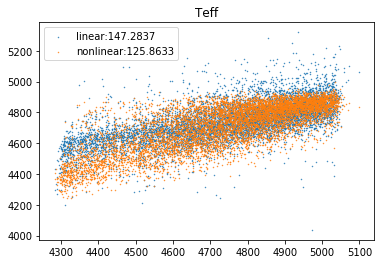

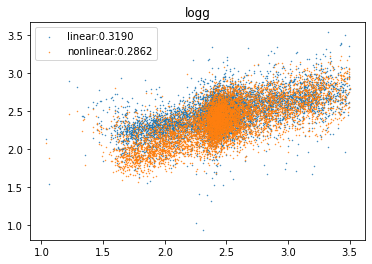

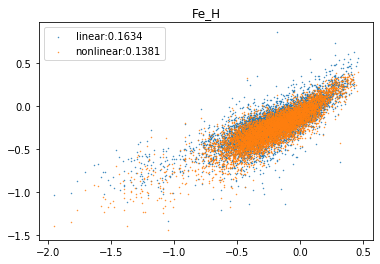

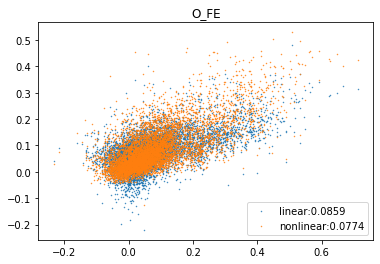

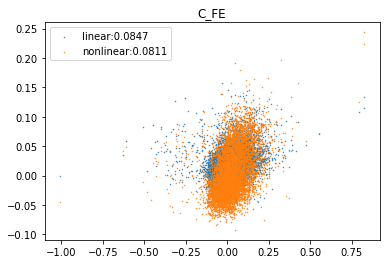

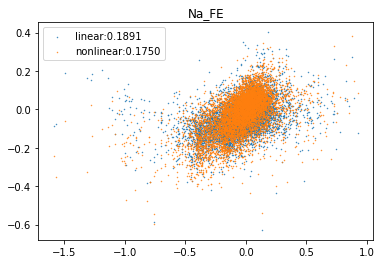

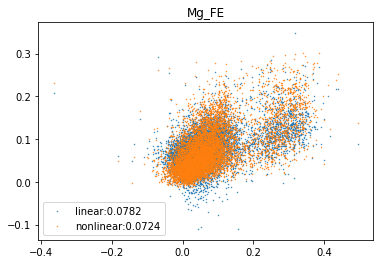

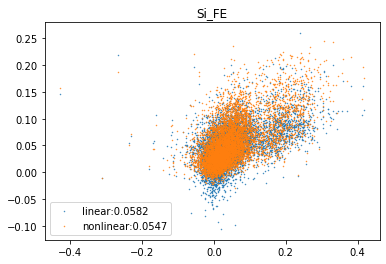

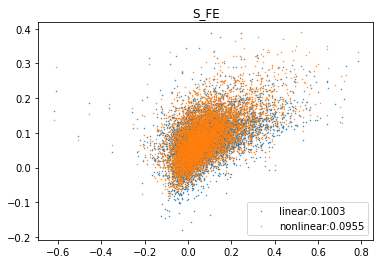

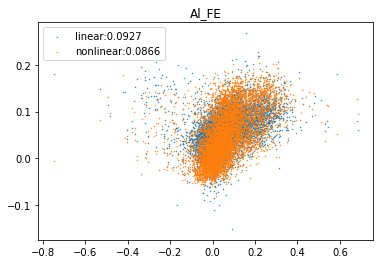

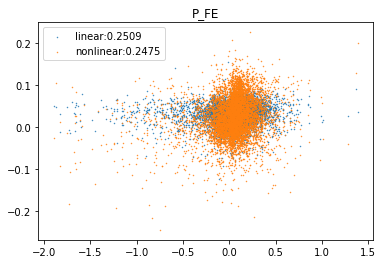

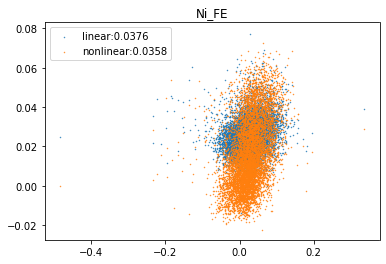

In [646]:
for i in range(len(considered_parameters)):
    plt.title(considered_parameters[i])
    nonlinear_std = np.std(nonlinear_w.predict(z).raw[:,i]-y.raw[:,i])
    linear_std = np.std(w.predict(z).raw[:,i]-y.raw[:,i])

    plt.scatter(y.raw[:,i],w.predict(z).raw[:,i],s=0.2,label="linear:{:.4f}".format(linear_std))
    plt.scatter(y.raw[:,i],nonlinear_w.predict(z).raw[:,i],s=0.2,label="nonlinear:{:.4f}".format(nonlinear_std))
    plt.legend()
    plt.show()

In [566]:
y_astronn = vector.AstroNNVector(allStar[:n_data][combined_cut[:n_data]],considered_parameters)

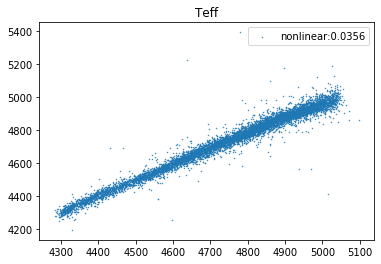

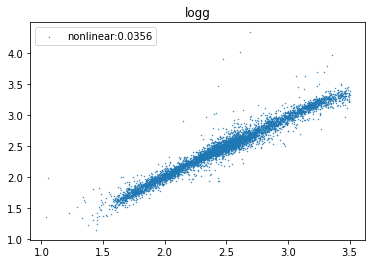

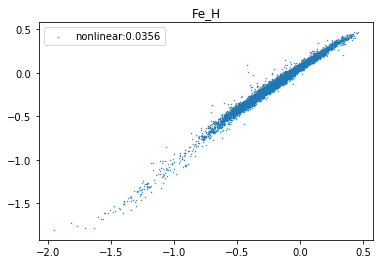

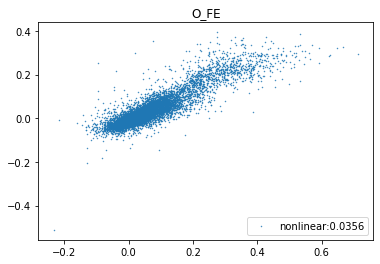

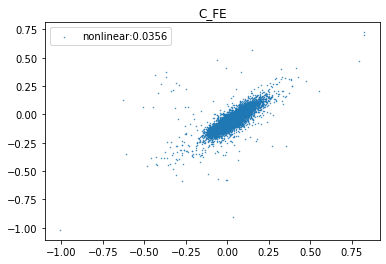

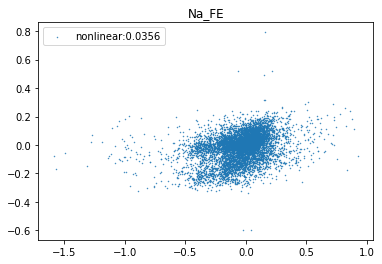

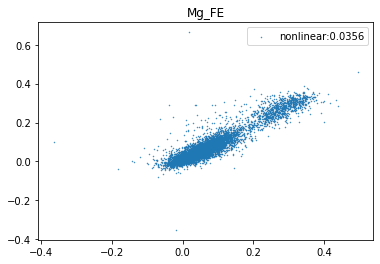

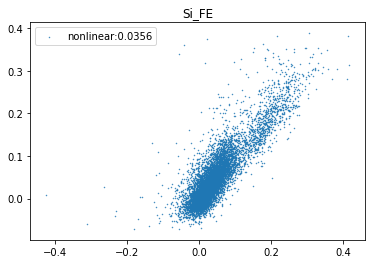

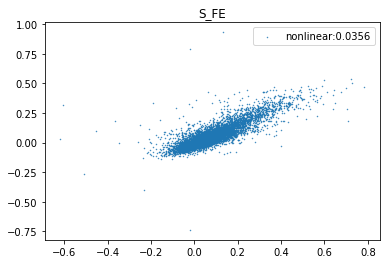

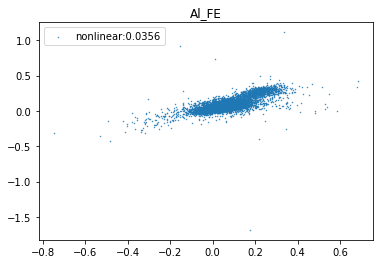

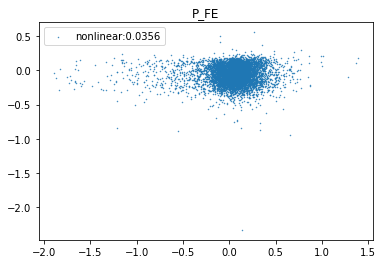

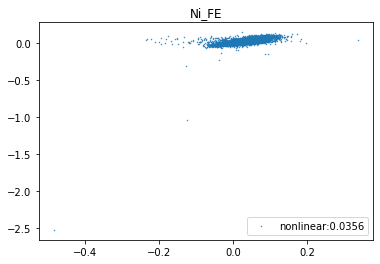

In [577]:
for i in range(len(considered_parameters)):
    plt.title(considered_parameters[i])
    plt.scatter(y.raw[:,i],y_astronn.raw[:,i],s=0.2,label="nonlinear:{:.4f}".format(nonlinear_std))
    plt.legend()
    plt.show()

(1100, 1150)

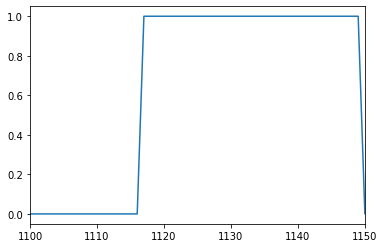

In [585]:
plt.plot(get_mask_elem("Mg"))
plt.xlim(1100,1150)

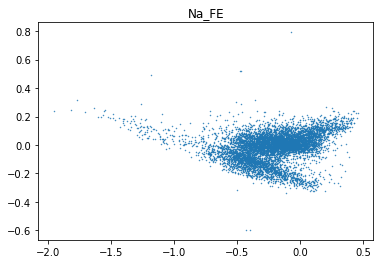

In [612]:
i = 5
plt.title(considered_parameters[i])
plt.scatter(y.raw[:,2],y_astronn.raw[:,i],s=0.2,label="nonlinear:{:.4f}".format(nonlinear_std))


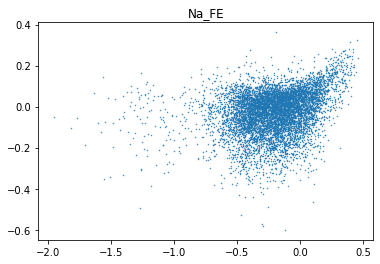

In [613]:
i = 5
plt.title(considered_parameters[i])
plt.scatter(y.raw[:,2],nonlinear_w.predict(z).raw[:,i],s=0.2,label="nonlinear:{:.4f}".format(nonlinear_std))


In [648]:
y_astronn.raw.shape

(7300, 12)

NameError: name 'PCA' is not defined

### Investigating chemical tagging as a method

Instead of using an autoencoder could we not just learn the biases in the data from applying the PCA procedure on astroNN abundances.

In [650]:
from sklearn.decomposition import PCA


In [651]:
whitener = PCA(n_components=12,whiten=True)



In [655]:
whitener.fit(y_astronn.normalized)

PCA(copy=True, iterated_power='auto', n_components=12, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)

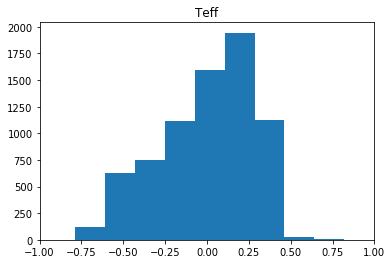

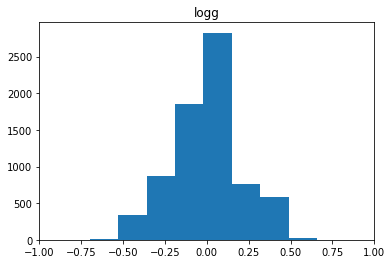

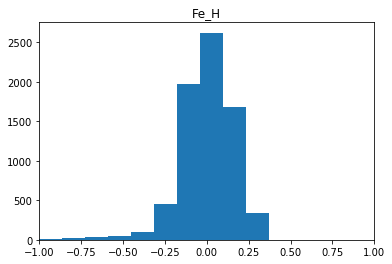

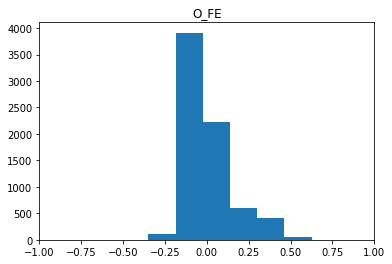

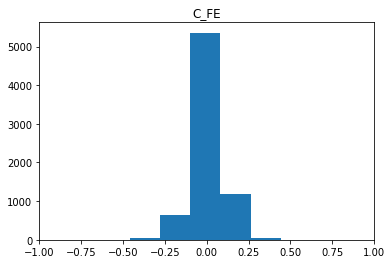

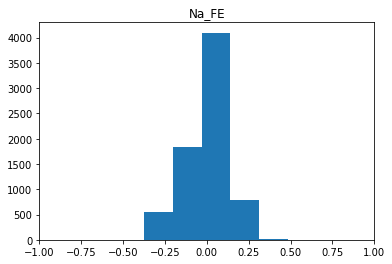

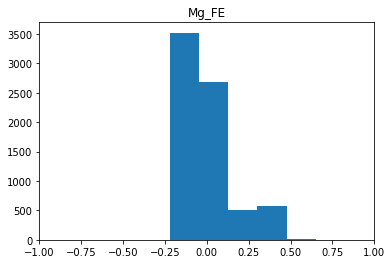

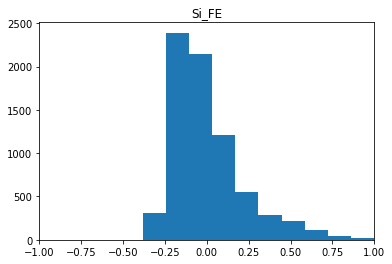

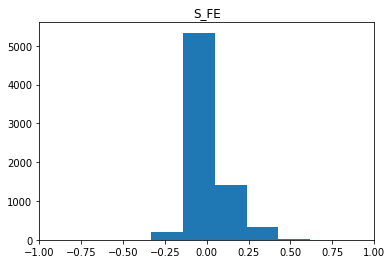

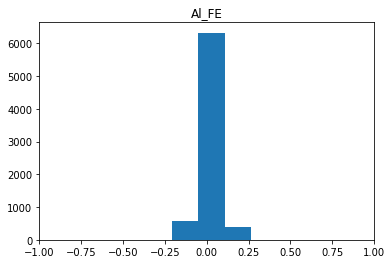

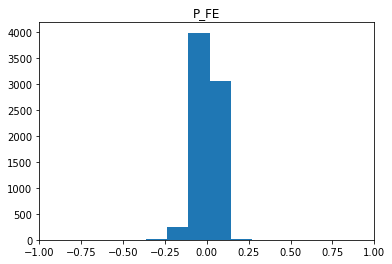

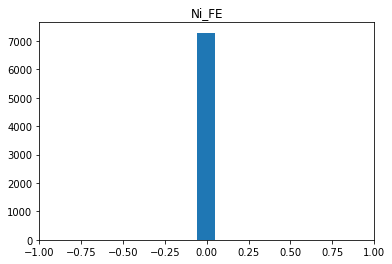

In [661]:
for i in range(12):
    plt.hist(y_astronn.normalized[:,i])
    plt.title(considered_parameters[i])
    plt.xlim(-1,1)
    plt.show()